Read .nc files

In [1]:
import xarray as xr

# Open the NetCDF file
file_path = r"D:\CAMS\CAMS_global_reanalysis_EAC4\chem_singlvl\final_2003_2024\CAMS_global_reanalysis_EAC4_chem_singlvl_202407.nc"
ds = xr.open_dataset(file_path)

# Display the dataset's structure and metadata
print("Dataset Overview:\n")
print(ds)

# List all variables in the dataset
print("\nAvailable Variables:")
for var in ds.variables:
    print(f"- {var}: {ds[var].dims}, {ds[var].shape}")


Dataset Overview:

<xarray.Dataset> Size: 7MB
Dimensions:    (time: 248, latitude: 30, longitude: 78)
Coordinates:
  * time       (time) datetime64[ns] 2kB 2024-07-01 ... 2024-07-31T21:00:00
  * latitude   (latitude) float64 240B 51.75 51.0 50.25 49.5 ... 31.5 30.75 30.0
  * longitude  (longitude) float64 624B -20.0 -19.25 -18.5 ... 36.25 37.0 37.75
Data variables:
    pm1        (time, latitude, longitude) float32 2MB ...
    pm2p5      (time, latitude, longitude) float32 2MB ...
    pm10       (time, latitude, longitude) float32 2MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-17T19:00 GRIB to CDM+CF via cfgrib-0.9.1...

Available Variables:
- time: ('time',), (248,)
- latitude: ('latitude',), (30,)
- longitude: ('longi

Read .mat files

In [ ]:
from scipy.io import loadmat

data = loadmat(r"D:\CAMS\MODIS_FRP\MODIS_2001.mat", struct_as_record=False, squeeze_me=True)

dados = data["dados"]  # Extract variable

print("Type of 'dados':", type(dados))

if hasattr(dados, "_fieldnames"):  # Check if it's a struct
    print("Struct fields:", dados._fieldnames)
    for field in dados._fieldnames:
        print(f"Field '{field}':", getattr(dados, field))

View on map

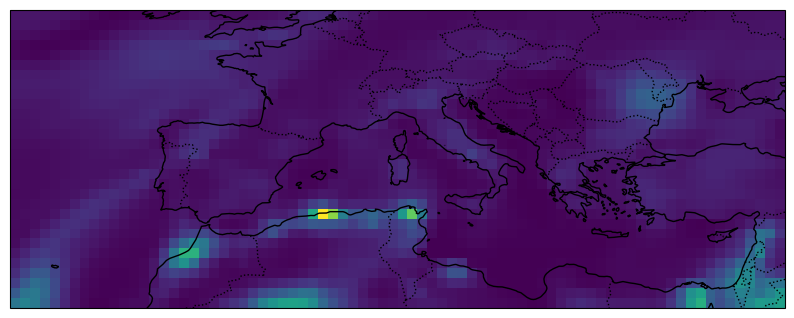

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load your NetCDF file (change the path accordingly)
file_path = r"D:\CAMS\CAMS_global_reanalysis_EAC4\chem_singlvl\final_2003_2024\CAMS_global_reanalysis_EAC4_chem_singlvl_202301.nc"
ds = xr.open_dataset(file_path)

# Extract the data you want to plot (for example, pm10)
pm10_data = ds['pm2p5'].isel(time=0)  # Select the first time step (change if needed)

# Extract longitude and latitude values
lon = ds['longitude'].values
lat = ds['latitude'].values

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set up the map: add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the data (you can adjust the colormap and other settings)
c = ax.pcolormesh(lon, lat, pm10_data, cmap='viridis', shading='auto', transform=ccrs.PlateCarree())

# Show the plot
plt.show()

# Close the dataset after processing
ds.close()
